In [2]:
%pip install scikit-learn
%pip install seaborn

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_squared_error

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score

from sklearn.metrics import precision_score, roc_auc_score

from sklearn.metrics import roc_curve, auc

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV, KFold

from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


El objetivo del dataset es ver las estafas/fraudes de tarjetas de credito  ver las diferentes caracteristicas de las personas que fueron estafadas y las que no. Nosotros buscamos predecir TARGET(si fue o no estafada) y buscar una relacion con las diferentes columnas.

El dataset cuenta con columnas como CODE_GENDER (el genero), NAME_CONTRACT TYPE (que indica si fue un prestamo de efectivo o un prestamo revolvente), CNT_CHILDREN (cantidad de hijos), etc. Con todo esto se busca establecer patrones y poder hacer que los modelos sean capaces de interpretarlos y predecir TARGET con exito

In [3]:
# https://www.kaggle.com/datasets/mishra5001/credit-card

credit_ds = pd.read_csv("application_data.csv")

credit_ds

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
credit_ds.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

Limpio el dataset para que no haya filas con valores null

In [5]:
#Me fijo cuantas veces aparece el 1 y el 0 en la columna TARGET
print(credit_ds['TARGET'].value_counts())

#Elimino valores null
credit_ds_clean = credit_ds.dropna()

#creo dos sub-datasets, uno para donde TARGET es 0 y otro para cuando es 1
class_0 = credit_ds_clean[credit_ds_clean['TARGET'] == 0]
class_1 = credit_ds_clean[credit_ds_clean['TARGET'] == 1]
print(class_0.shape[0], class_1.shape[0])

#Me fijo cuantas filas tiene 
cant_1 = class_1.shape[0]


# Agarro misma cantidad de 1 y 0 para que el nuevo dataset este balanceado
class_0_sample = class_0.sample(n=cant_1, random_state=42)  
class_1_sample = class_1.sample(n=cant_1, random_state=42) 

# Combino ambos sub-datasets en uno nuevo y los mezclo 
balanced_ds = pd.concat([class_0_sample, class_1_sample])
balanced_ds = balanced_ds.sample(frac=1, random_state=42).reset_index(drop=True)

# Me fijo nuevamente cuantas muestras hay de 1 y 0 en TARGET para ver si se filtro bien
print(balanced_ds['TARGET'].value_counts())
balanced_ds

TARGET
0    282686
1     24825
Name: count, dtype: int64
8076 526
TARGET
0    526
1    526
Name: count, dtype: int64


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,406420,0,Revolving loans,M,Y,Y,1,67500.0,180000.0,9000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
1,296707,1,Revolving loans,F,Y,Y,0,94500.0,180000.0,9000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,145273,0,Cash loans,M,Y,N,0,387000.0,1575000.0,65128.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0
3,433095,1,Cash loans,F,Y,Y,0,126000.0,173196.0,14809.5,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,2.0
4,313040,0,Cash loans,M,Y,N,0,157500.0,135000.0,9823.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,213769,0,Cash loans,M,Y,Y,0,180000.0,528633.0,39654.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
1048,446521,0,Cash loans,F,Y,Y,2,225000.0,1886850.0,52015.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
1049,289833,0,Cash loans,M,Y,Y,0,180000.0,553806.0,26770.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1050,415270,1,Revolving loans,M,Y,Y,1,270000.0,810000.0,40500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Exploracion del dataset

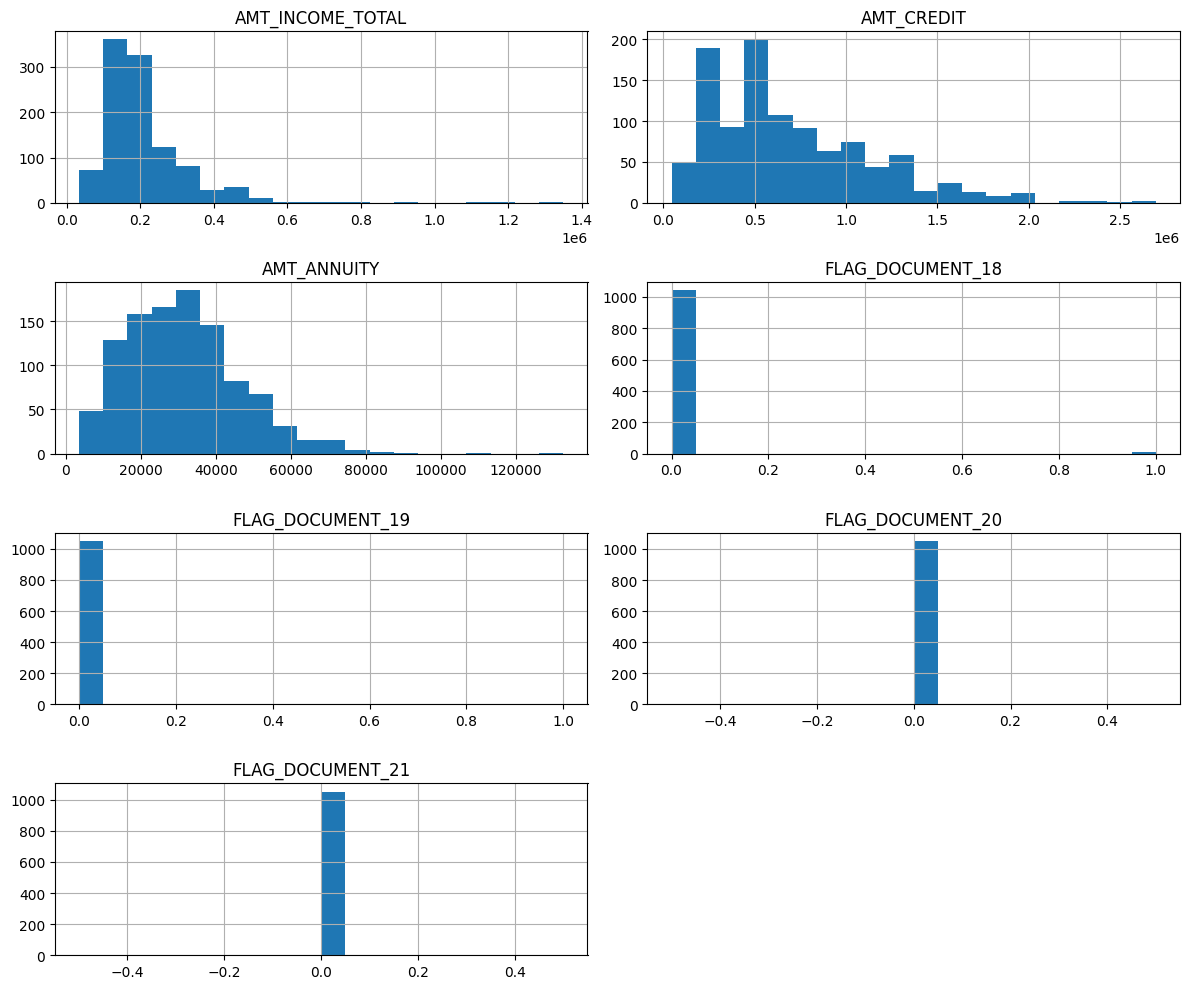

In [6]:
# Seleccionar las columnas que mencionas
columns = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 
           'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

# Crear subplots de histogramas para cada columna
balanced_ds[columns].hist(figsize=(12, 10), bins=20, layout=(4, 2))

# Ajustar el layout y mostrar los gráficos
plt.tight_layout()
plt.show()

In [7]:
# Filtro mi dataset para quedarme solo con los datos que son numericos

numeric_credit_ds = balanced_ds.select_dtypes(include='number')

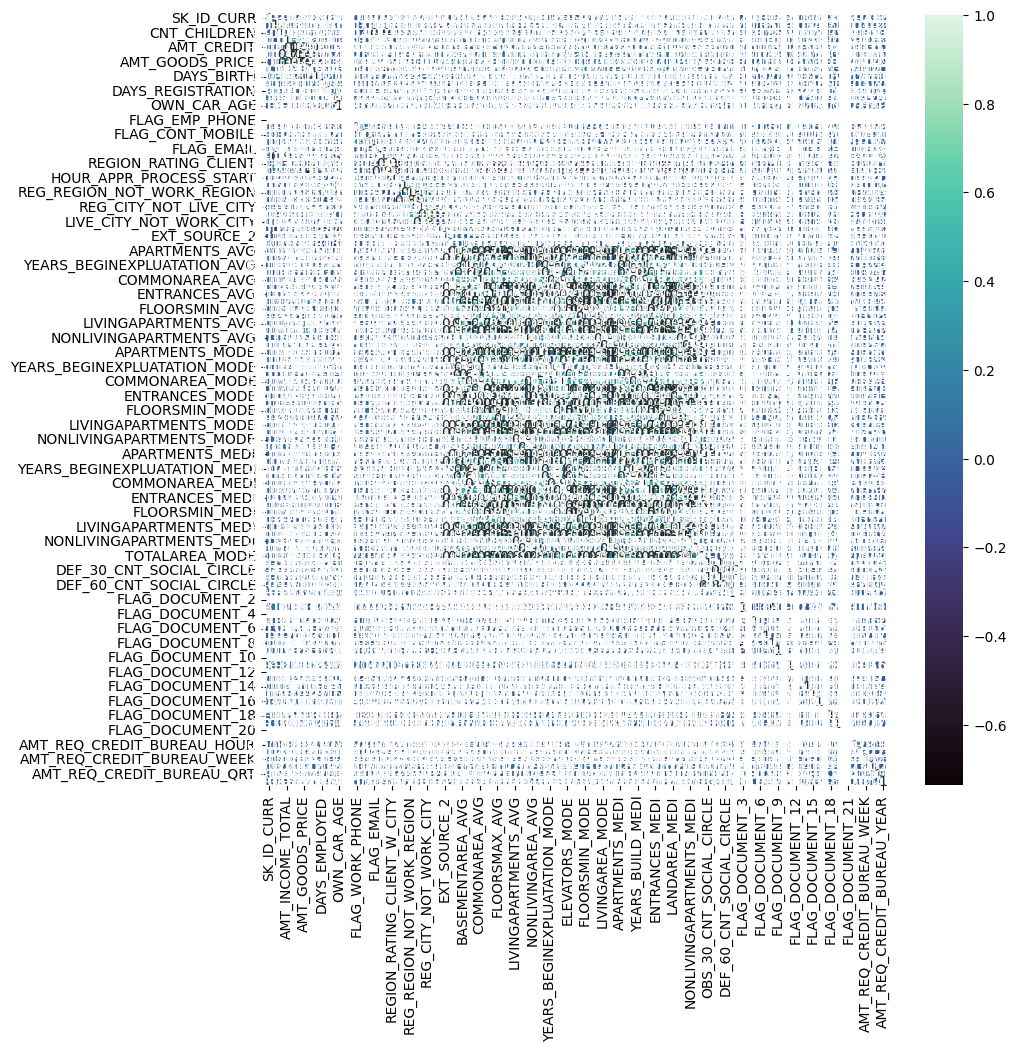

In [8]:
#Hago un mapa de calor para (intentar) ver las relaciones
 
cm = balanced_ds['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL'].corr()

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, ax=ax, cmap="mako", annot=True)
plt.show()

Regresion logistica sin atributos categoricos

In [9]:
#Divido el dataset numerico en X (valores CON LOS QUE predecir) e Y (valor A predecir)

X_df = numeric_credit_ds.drop(columns=['TARGET']) 

y_df = numeric_credit_ds[['TARGET']]

X_train, X_test, y_train, y_test = train_test_split(
    X_df, y_df, test_size=0.2, random_state=42
)

In [10]:
#Creo el modelo de regresion logica

RL_num = LogisticRegression()
RL_num.fit(X_train, y_train)
y_pred = RL_num.predict(X_test)

c:\Python310\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
#Calculo el error cuadratico

mse = mean_squared_error(y_test, y_pred)
mse

0.4549763033175355

In [12]:
#Calculo el coeficiente

print("Coefficients:", RL_num.coef_)
print("Intercept:", RL_num.intercept_)

Coefficients: [[ 1.22646074e-06 -4.58220058e-08 -2.76789572e-06  1.92532731e-06
   2.66702458e-05 -2.45805064e-06 -1.63034083e-10  7.21645178e-06
   1.79661546e-04 -3.59445709e-05  2.63700295e-05  7.82797381e-07
   9.81007794e-09  9.81007794e-09  3.96864314e-08  9.97106391e-09
   1.98839785e-08  2.48612644e-08 -6.82995613e-08  1.03977602e-07
   9.91583913e-08 -4.37229408e-08  3.76016240e-09  5.15187243e-09
   1.13029784e-08  4.82839023e-09  1.27757425e-08  7.01715942e-09
  -6.37665183e-08 -5.25507004e-08 -7.83377903e-08 -6.50402509e-09
  -4.95504689e-09  8.76563032e-09 -4.24349605e-09 -3.57180701e-10
  -4.63794857e-09 -8.41031261e-10 -1.16551762e-08 -7.39304461e-09
   5.96956809e-09 -6.58302041e-09 -6.57682463e-09  3.04099362e-09
  -5.26421156e-10 -4.90179471e-09 -3.34216673e-09  8.83563588e-09
  -3.43535839e-09  3.52082499e-10 -3.15098488e-09  3.03225391e-10
  -1.17151324e-08 -6.21996653e-09  6.21911056e-09 -6.62240552e-09
  -5.37448045e-09  3.08047156e-09  1.13862703e-09 -5.89810913e

In [13]:
#Calculo precision
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5450236966824644


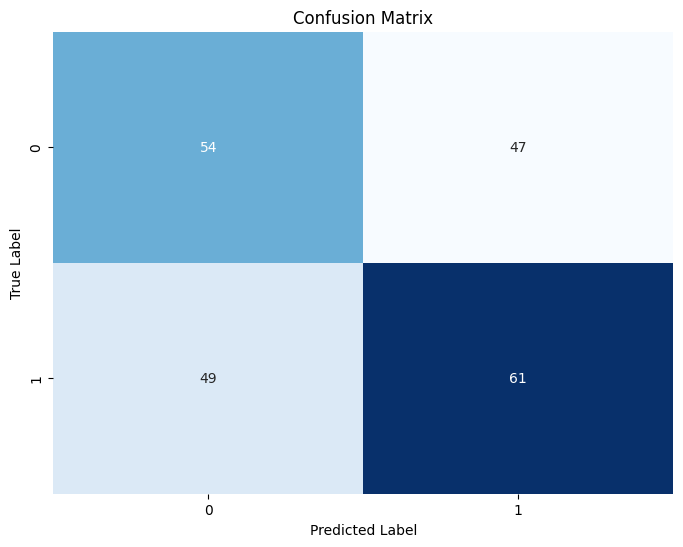

In [14]:
#Veo los True Positive, False Positive, True Negative, False Negative

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Precisión: 0.5648148148148148
ROC AUC Score: 0.5735373537353735
ROC AUC Score: 0.5735373537353735


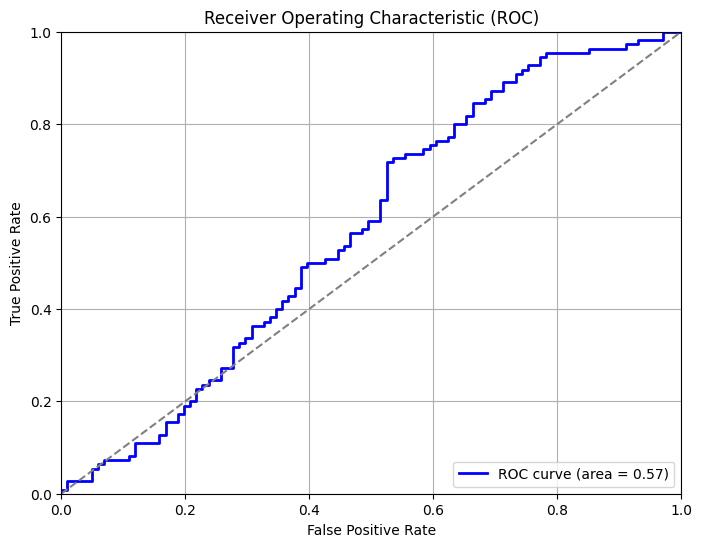

In [15]:
# Calcular la precisión
precision = precision_score(y_test, y_pred)
print("Precisión:", precision)

# Calcular el ROC AUC Score
# Para ROC AUC se necesita el puntaje de probabilidad de las predicciones
y_pred_proba = RL_num.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)
print("ROC AUC Score:", roc_auc)


# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea diagonal de referencia
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.show()


Arbol de desiciones solo con numeros

In [16]:
arbol_num = DecisionTreeClassifier()
arbol_num.fit(X_train, y_train)

y_pred_arbol = arbol_num.predict(X_test)
y_pred_proba_arbol = arbol_num.predict_proba(X_test)[:, 1]

In [17]:
max_depth = arbol_num.get_depth()
max_leaf_nodes = arbol_num.get_n_leaves()
min_samples_split = arbol_num.get_n_leaves()
min_leaf_samples = arbol_num.get_n_leaves()

print("Max Depth:", max_depth)
print("max_leaf_nodes:", max_leaf_nodes)
print("min_samples_split:", min_samples_split)
print("min_leaf_samples:", min_leaf_samples)

Max Depth: 15
max_leaf_nodes: 137
min_samples_split: 137
min_leaf_samples: 137


Precisión (arbol_num): 0.6041666666666666


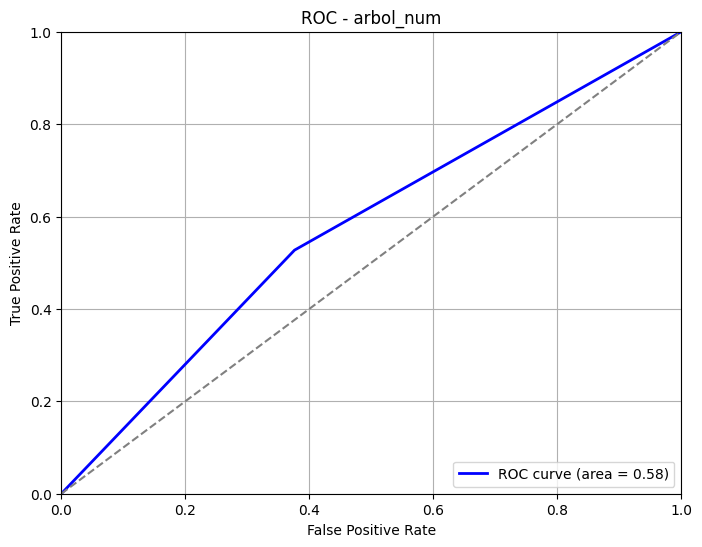

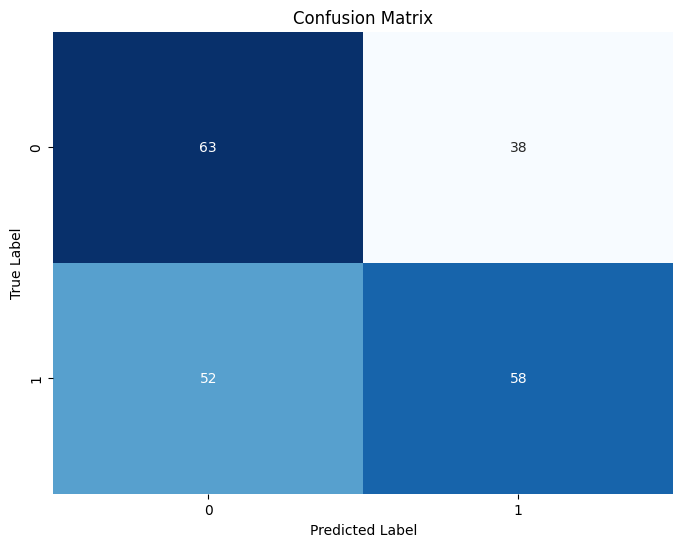

Importancia de Atributos (arbol_num):
EXT_SOURCE_3                0.126962
EXT_SOURCE_1                0.111905
DAYS_EMPLOYED               0.066711
DAYS_BIRTH                  0.055556
EXT_SOURCE_2                0.052985
                              ...   
NONLIVINGAPARTMENTS_MEDI    0.000000
FLAG_WORK_PHONE             0.000000
FLAG_EMP_PHONE              0.000000
OBS_30_CNT_SOCIAL_CIRCLE    0.000000
FLOORSMAX_MODE              0.000000
Length: 105, dtype: float64


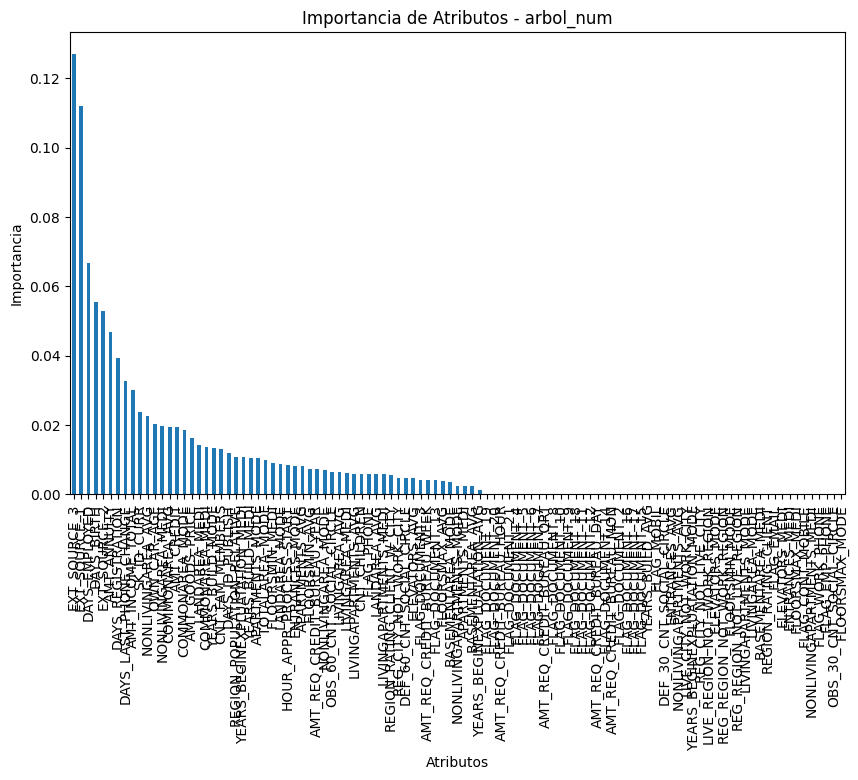

In [18]:
# Calcular la precisión
precision_arbol = precision_score(y_test, y_pred_arbol)
print("Precisión (arbol_num):", precision_arbol)

# Generar la curva ROC
fpr_arbol, tpr_arbol, _ = roc_curve(y_test, y_pred_proba_arbol)
roc_auc_arbol = auc(fpr_arbol, tpr_arbol)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_arbol, tpr_arbol, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_arbol:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea diagonal de referencia
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - arbol_num')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_arbol)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Importancia de los atributos
importances_arbol = arbol_num.feature_importances_
feature_names = X_train.columns
feature_importances_arbol = pd.Series(importances_arbol, index=feature_names).sort_values(ascending=False)

print("Importancia de Atributos (arbol_num):")
print(feature_importances_arbol)

# Visualizar la importancia de los atributos
plt.figure(figsize=(10, 6))
feature_importances_arbol.plot(kind='bar')
plt.title('Importancia de Atributos - arbol_num')
plt.xlabel('Atributos')
plt.ylabel('Importancia')
plt.show()

Con k-fold, busco crear un arbol de numeros mas preciso

In [19]:
Hiperparametros = {
    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
}

# Configurar la validación cruzada por k-fold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Configurar GridSearchCV para explorar los mejores hiperparámetros
grid_search = GridSearchCV(estimator=arbol_num, param_grid=Hiperparametros, cv=kfold, scoring='accuracy', n_jobs=-1, verbose=1)

# Ejecutar la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:", grid_search.best_params_)


Fitting 5 folds for each of 900 candidates, totalling 4500 fits


Mejores hiperparámetros encontrados: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [20]:
# Mejor estimador entrenado con los mejores hiperparámetros
best_dt_model = grid_search.best_estimator_

y_pred_best_arbol = best_dt_model.predict(X_test)
y_pred_proba_best_arbol = best_dt_model.predict_proba(X_test)[:, 1]

Precisión (best_dt_model): 0.640625


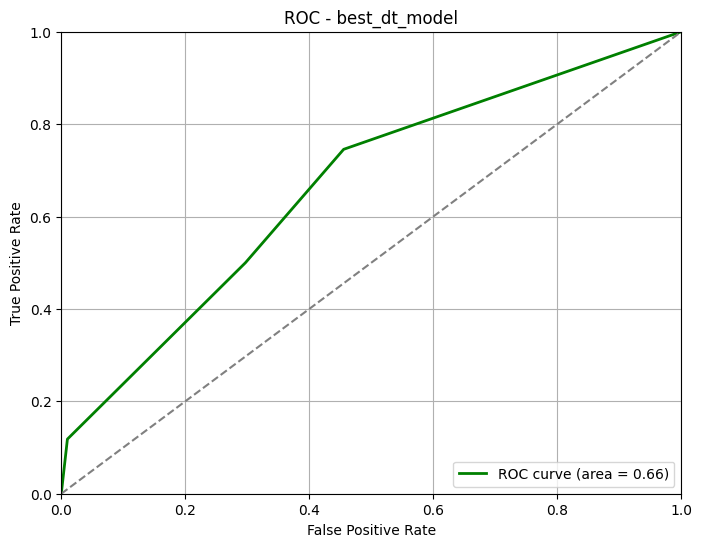

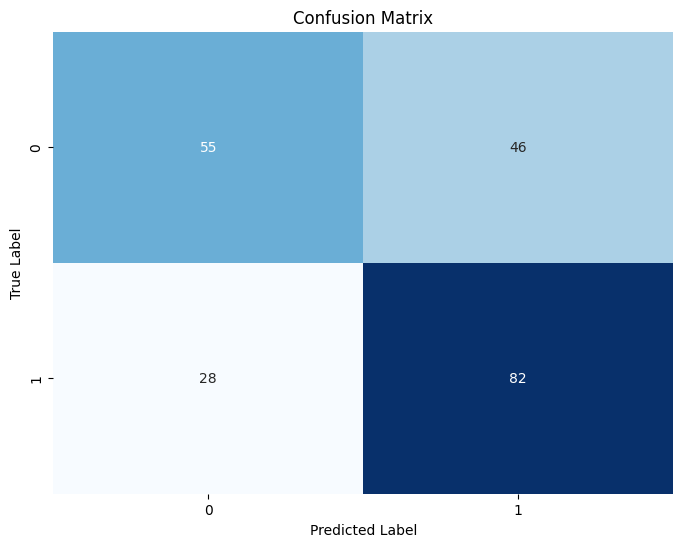

Importancia de Atributos (best_dt_model):
EXT_SOURCE_3                   0.577751
EXT_SOURCE_1                   0.246224
EXT_SOURCE_2                   0.176025
LANDAREA_MEDI                  0.000000
DEF_60_CNT_SOCIAL_CIRCLE       0.000000
                                 ...   
YEARS_BUILD_AVG                0.000000
YEARS_BEGINEXPLUATATION_AVG    0.000000
BASEMENTAREA_AVG               0.000000
APARTMENTS_AVG                 0.000000
AMT_REQ_CREDIT_BUREAU_YEAR     0.000000
Length: 105, dtype: float64


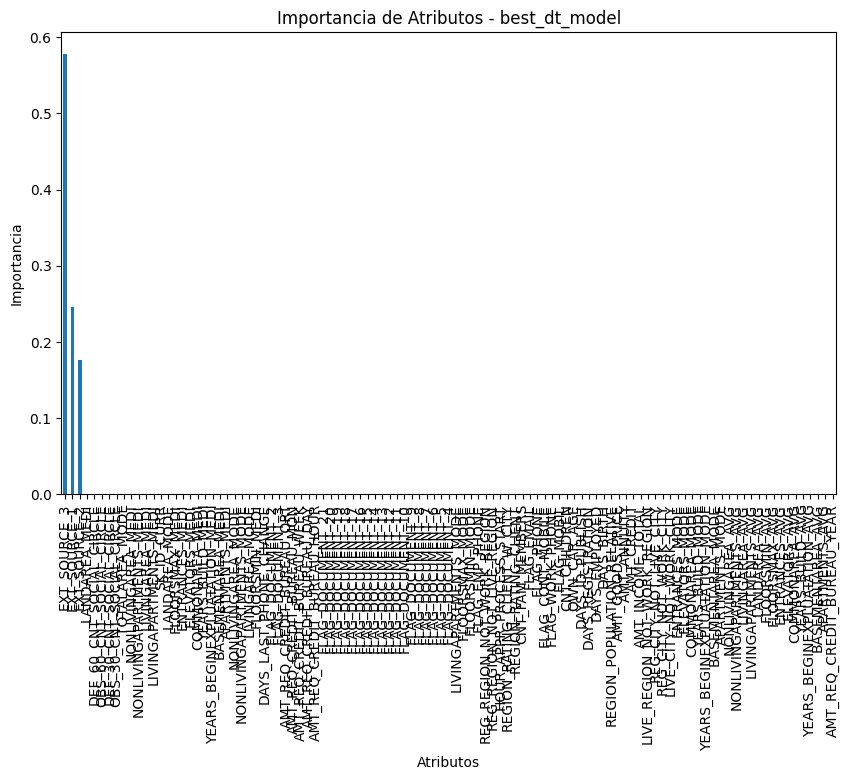

In [21]:
# Calcular la precisión
precision_best_dt = precision_score(y_test, y_pred_best_arbol)
print("Precisión (best_dt_model):", precision_best_dt)

# Generar la curva ROC
fpr_best_dt, tpr_best_dt, _ = roc_curve(y_test, y_pred_proba_best_arbol)
roc_auc_best_dt = auc(fpr_best_dt, tpr_best_dt)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_best_dt, tpr_best_dt, color='green', lw=2, label=f'ROC curve (area = {roc_auc_best_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea diagonal de referencia
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - best_dt_model')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_best_arbol)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Importancia de los atributos
importances_best_dt = best_dt_model.feature_importances_
feature_names = X_train.columns
feature_importances_best_dt = pd.Series(importances_best_dt, index=feature_names).sort_values(ascending=False)

print("Importancia de Atributos (best_dt_model):")
print(feature_importances_best_dt)

# Visualizar la importancia de los atributos
plt.figure(figsize=(10, 6))
feature_importances_best_dt.plot(kind='bar')
plt.title('Importancia de Atributos - best_dt_model')
plt.xlabel('Atributos')
plt.ylabel('Importancia')
plt.show()

Transformacion de categoricos en numericos

In [22]:
# Identifica las columnas categóricas
categorical_cols = balanced_ds.select_dtypes(include=['object', 'category']).columns

# Define el transformador para aplicar OneHotEncoder a las columnas categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)],
    remainder='passthrough'  # Deja las demás columnas intactas
)

# Aplica la transformación
ohe_transformed_ds = preprocessor.fit_transform(balanced_ds)

# Convertir el resultado a un DataFrame
ohe_transformed_ds = pd.DataFrame(ohe_transformed_ds, columns=preprocessor.get_feature_names_out())

# Visualiza las primeras filas del dataset transformado
#print (ohe_transformed_ds.head())
ohe_transformed_ds.columns

Index(['cat__NAME_CONTRACT_TYPE_Cash loans',
       'cat__NAME_CONTRACT_TYPE_Revolving loans', 'cat__CODE_GENDER_F',
       'cat__CODE_GENDER_M', 'cat__FLAG_OWN_CAR_Y', 'cat__FLAG_OWN_REALTY_N',
       'cat__FLAG_OWN_REALTY_Y', 'cat__NAME_TYPE_SUITE_Children',
       'cat__NAME_TYPE_SUITE_Family', 'cat__NAME_TYPE_SUITE_Group of people',
       ...
       'remainder__FLAG_DOCUMENT_18', 'remainder__FLAG_DOCUMENT_19',
       'remainder__FLAG_DOCUMENT_20', 'remainder__FLAG_DOCUMENT_21',
       'remainder__AMT_REQ_CREDIT_BUREAU_HOUR',
       'remainder__AMT_REQ_CREDIT_BUREAU_DAY',
       'remainder__AMT_REQ_CREDIT_BUREAU_WEEK',
       'remainder__AMT_REQ_CREDIT_BUREAU_MON',
       'remainder__AMT_REQ_CREDIT_BUREAU_QRT',
       'remainder__AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=226)

In [23]:
# Identifica las columnas categóricas
categorical_cols = balanced_ds.select_dtypes(include=['object', 'category']).columns

# Copia el DataFrame para evitar modificar el original
le_transformed_ds = balanced_ds.copy()

# Aplica LabelEncoder a cada columna categórica
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    le_transformed_ds[col] = le.fit_transform(le_transformed_ds[col])
    label_encoders[col] = le  # Guarda el LabelEncoder para futuras transformaciones

# Visualiza las primeras filas del dataset transformado
print(le_transformed_ds.head())

   SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      406420       0                   1            1             0   
1      296707       1                   1            0             0   
2      145273       0                   0            1             0   
3      433095       1                   0            0             0   
4      313040       0                   0            1             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             1           67500.0    180000.0       9000.0   
1                1             0           94500.0    180000.0       9000.0   
2                0             0          387000.0   1575000.0      65128.5   
3                1             0          126000.0    173196.0      14809.5   
4                0             0          157500.0    135000.0       9823.5   

   ...  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
0  ...                 0    

Regesion logistica con categoricos (Label Encoding)

In [24]:
x_LE = le_transformed_ds.drop(columns=['TARGET']) 

y_LE = le_transformed_ds[['TARGET']]

# Dividir el dataset en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(x_LE, y_LE, test_size=0.2, random_state=42)

RL_LE = LogisticRegression()
RL_LE.fit(X_train, y_train)

c:\Python310\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
#Calculo el error cuadratico

error_cuadratico = mean_squared_error(y_test, y_pred)
error_cuadratico

0.4549763033175355

In [26]:
#Calculo el coeficiente

print("Coefficients:", RL_LE.coef_)
print("Intercept:", RL_LE.intercept_)

Coefficients: [[ 1.16944186e-06 -3.67475677e-08  3.28179864e-08  0.00000000e+00
  -6.03668351e-09 -4.02633323e-08 -2.85435837e-06  1.91381863e-06
   2.62415811e-05 -2.43208003e-06  9.46269601e-08  9.76016425e-08
   2.18560312e-07  3.40184534e-08  1.10060440e-07 -1.43756837e-10
   4.75491336e-06  1.82197894e-04 -3.77732354e-05  2.63152251e-05
   6.66120146e-07  8.36142470e-09  8.36142470e-09  3.31427629e-08
   8.50253464e-09  1.65290603e-08  2.09338785e-08  3.63871202e-07
  -5.94518503e-08  8.74641733e-08  8.35321521e-08  1.21831393e-07
  -3.12834945e-08  3.26303984e-09  4.58554778e-09  9.72178104e-09
   4.19651283e-09  1.12684608e-08  6.41824581e-09 -2.04578254e-07
  -5.37169907e-08 -4.42356892e-08 -6.62917616e-08 -5.45003084e-09
  -4.16826526e-09  7.48322889e-09 -3.46161140e-09 -2.84023404e-10
  -3.87871843e-09 -7.04865116e-10 -9.74734445e-09 -6.25616595e-09
   5.05016176e-09 -5.52960319e-09 -5.51770133e-09  2.58461756e-09
  -4.62604289e-10 -4.10672947e-09 -2.79724036e-09  7.54123632e

Precisión (RL_LE): 0.5607476635514018


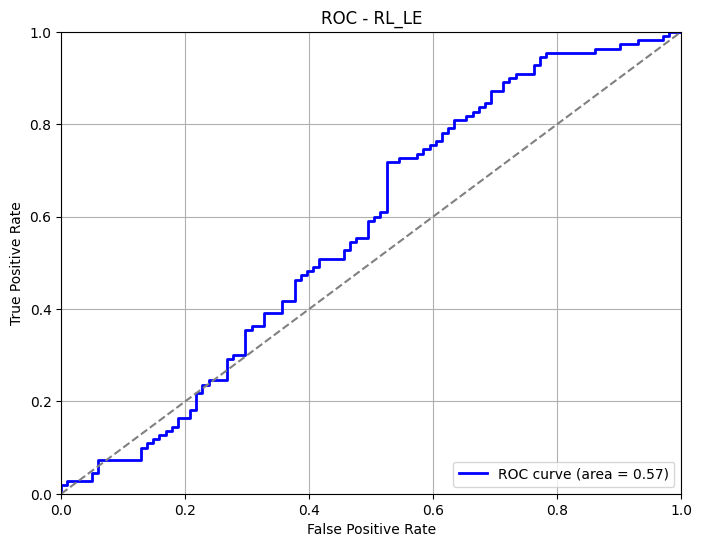

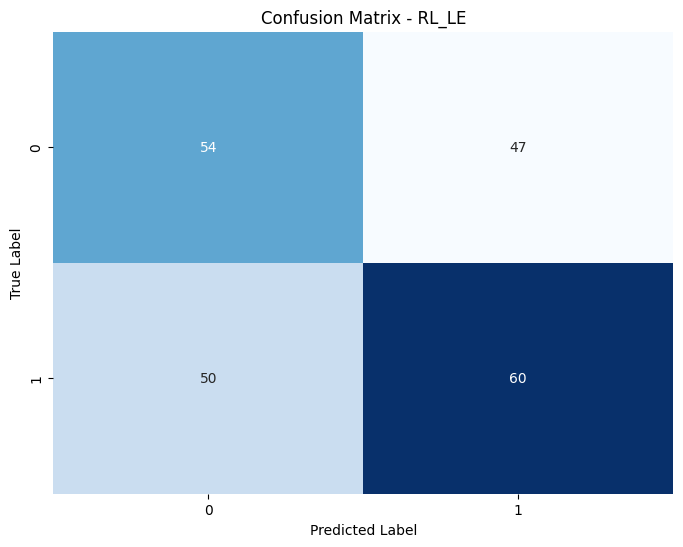

In [27]:
# Predecir en el conjunto de prueba
y_pred_rl_le = RL_LE.predict(X_test)
y_pred_proba_rl_le = RL_LE.predict_proba(X_test)[:, 1]

# Calcular la precisión
precision_rl_le = precision_score(y_test, y_pred_rl_le)
print("Precisión (RL_LE):", precision_rl_le)

# Generar la curva ROC
fpr_rl_le, tpr_rl_le, _ = roc_curve(y_test, y_pred_proba_rl_le)
roc_auc_rl_le = auc(fpr_rl_le, tpr_rl_le)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_rl_le, tpr_rl_le, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_rl_le:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - RL_LE')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Mostrar la matriz de confusión usando seaborn heatmap
conf_matrix_rl_le = confusion_matrix(y_test, y_pred_rl_le)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rl_le, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - RL_LE')
plt.show()

Arbol de desiciones con categoricos

Precisión (tree_LE): 0.5684210526315789


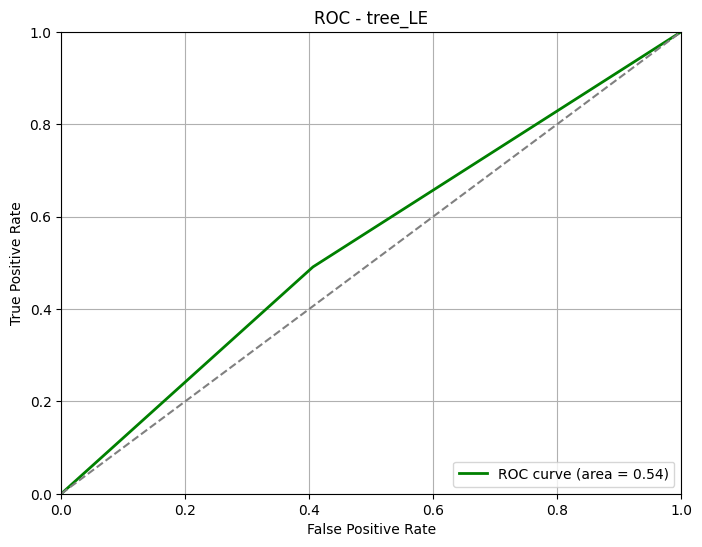

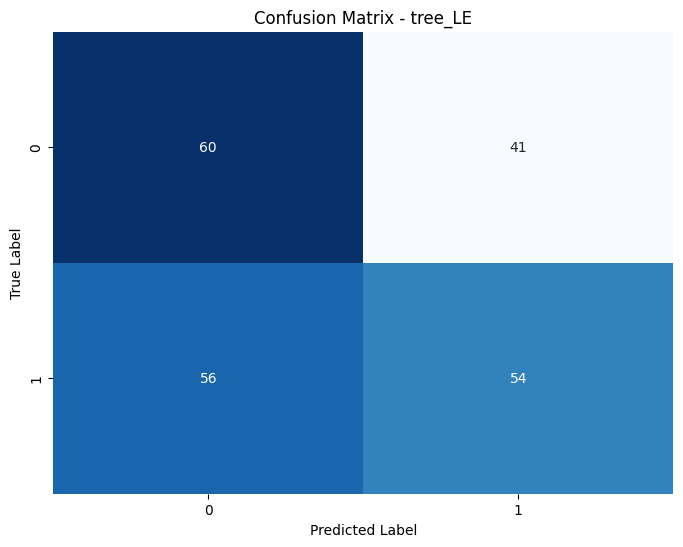

Importancia de Atributos (tree_LE):
EXT_SOURCE_3                   0.127008
EXT_SOURCE_1                   0.102004
DAYS_EMPLOYED                  0.051809
EXT_SOURCE_2                   0.043576
ORGANIZATION_TYPE              0.038600
                                 ...   
LANDAREA_MEDI                  0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000
LIVINGAREA_MEDI                0.000000
ELEVATORS_AVG                  0.000000
REGION_RATING_CLIENT           0.000000
Length: 121, dtype: float64


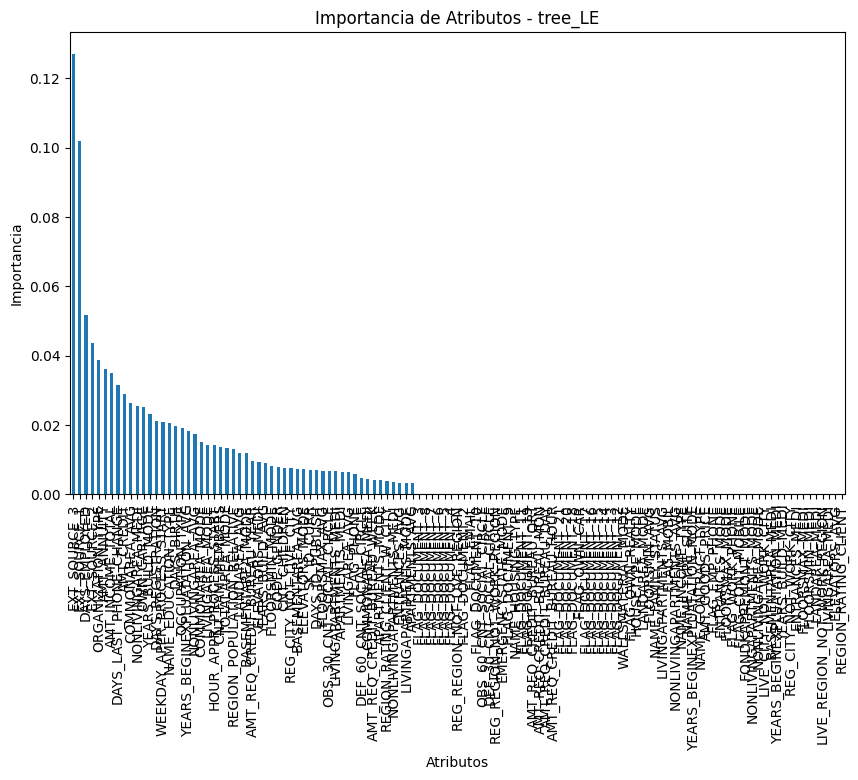

In [28]:
# Inicializar y entrenar el modelo de árbol de decisión
tree_LE = DecisionTreeClassifier(random_state=42)
tree_LE.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_tree = tree_LE.predict(X_test)
y_pred_proba_tree = tree_LE.predict_proba(X_test)[:, 1]

# Calcular la precisión
precision_tree = precision_score(y_test, y_pred_tree)
print("Precisión (tree_LE):", precision_tree)

# Generar la curva ROC
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_pred_proba_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_tree, tpr_tree, color='green', lw=2, label=f'ROC curve (area = {roc_auc_tree:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - tree_LE')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Mostrar la matriz de confusión usando seaborn heatmap
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - tree_LE')
plt.show()

# Importancia de los atributos
importances_tree = tree_LE.feature_importances_
feature_importances_tree = pd.Series(importances_tree, index=X_train.columns).sort_values(ascending=False)

print("Importancia de Atributos (tree_LE):")
print(feature_importances_tree)

# Visualizar la importancia de los atributos
plt.figure(figsize=(10, 6))
feature_importances_tree.plot(kind='bar')
plt.title('Importancia de Atributos - tree_LE')
plt.xlabel('Atributos')
plt.ylabel('Importancia')
plt.show()


Arbol con categoricos y validacion K-Fold

Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}
Precisión (best_tree_LE): 0.640625


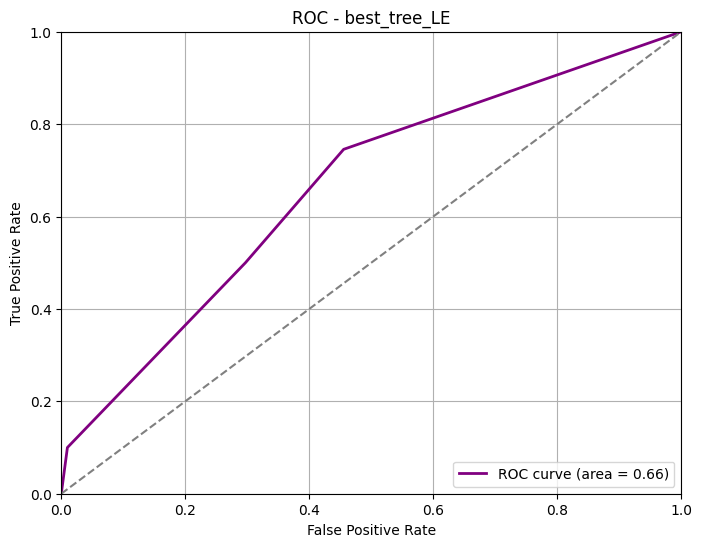

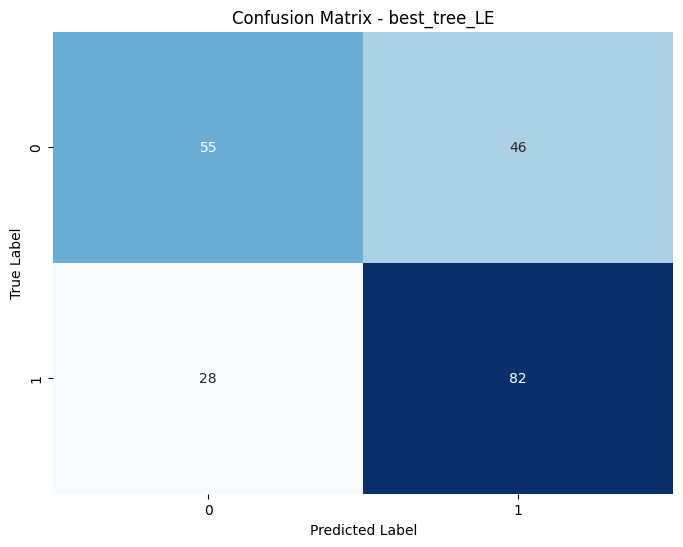

Importancia de Atributos (best_tree_LE):
EXT_SOURCE_3                   0.528553
EXT_SOURCE_1                   0.239528
EXT_SOURCE_2                   0.231918
SK_ID_CURR                     0.000000
FLOORSMAX_MEDI                 0.000000
                                 ...   
LIVE_REGION_NOT_WORK_REGION    0.000000
REG_REGION_NOT_WORK_REGION     0.000000
REG_REGION_NOT_LIVE_REGION     0.000000
HOUR_APPR_PROCESS_START        0.000000
AMT_REQ_CREDIT_BUREAU_YEAR     0.000000
Length: 121, dtype: float64


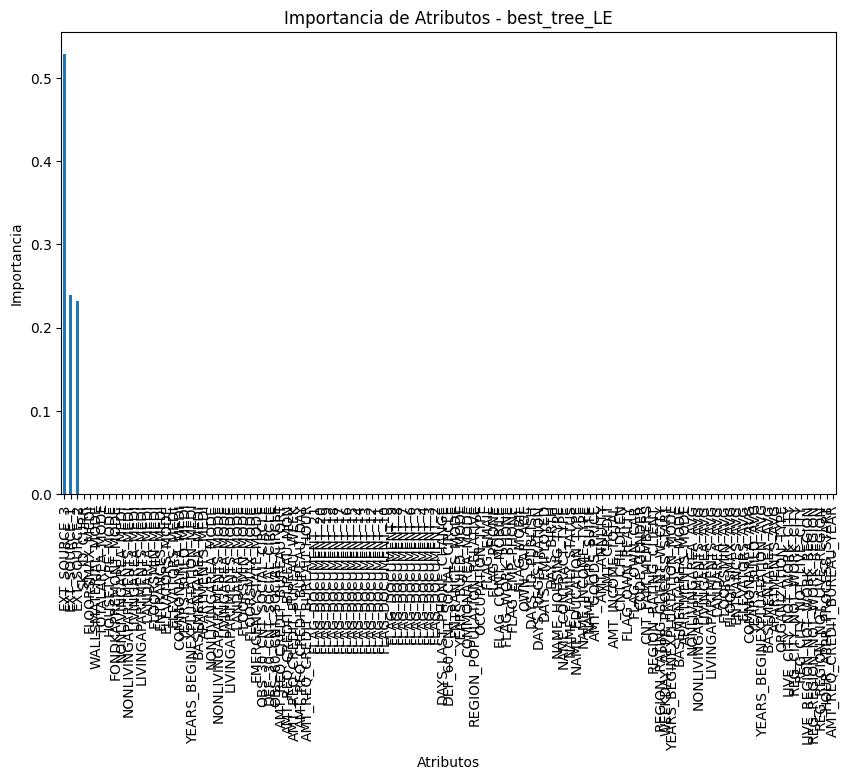

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x_LE, y_LE, test_size=0.2, random_state=42)

# Definir el modelo de árbol de decisión
tree_model_perfecto = DecisionTreeClassifier(random_state=42)

# Definir el rango de hiperparámetros a explorar
param_grid = {
    'max_depth': [2,3,4,5,6,7,8,9,10],
    'min_samples_split': [2,3,4,5,6,7,8,9,10],
    'min_samples_leaf': [2,3,4,5,6,7,8,9,10],
    'criterion': ['gini', 'entropy']
}

# Configurar GridSearchCV con validación cruzada k-fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=tree_model_perfecto, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1)

# Ejecutar la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_tree_LE = grid_search.best_estimator_

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Predecir en el conjunto de prueba con el mejor modelo
y_pred_best_tree_LE = best_tree_LE.predict(X_test)
y_pred_proba_best_tree_LE = best_tree_LE.predict_proba(X_test)[:, 1]

# Calcular la precisión
precision_best_tree_LE = precision_score(y_test, y_pred_best_tree_LE)
print("Precisión (best_tree_LE):", precision_best_tree_LE)

# Generar la curva ROC
fpr_best_tree_LE, tpr_best_tree_LE, _ = roc_curve(y_test, y_pred_proba_best_tree_LE)
roc_auc_best_tree_LE = auc(fpr_best_tree_LE, tpr_best_tree_LE)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_best_tree_LE, tpr_best_tree_LE, color='purple', lw=2, label=f'ROC curve (area = {roc_auc_best_tree_LE:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - best_tree_LE')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Mostrar la matriz de confusión usando seaborn heatmap
conf_matrix_best_tree_LE = confusion_matrix(y_test, y_pred_best_tree_LE)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best_tree_LE, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - best_tree_LE')
plt.show()

# Importancia de los atributos
importances_best_tree_LE = best_tree_LE.feature_importances_
feature_importances_best_tree_LE = pd.Series(importances_best_tree_LE, index=X_train.columns).sort_values(ascending=False)

print("Importancia de Atributos (best_tree_LE):")
print(feature_importances_best_tree_LE)

# Visualizar la importancia de los atributos
plt.figure(figsize=(10, 6))
feature_importances_best_tree_LE.plot(kind='bar')
plt.title('Importancia de Atributos - best_tree_LE')
plt.xlabel('Atributos')
plt.ylabel('Importancia')
plt.show()

BONUS!!!!!!

Precisión (bonus_rf): 0.5974025974025974


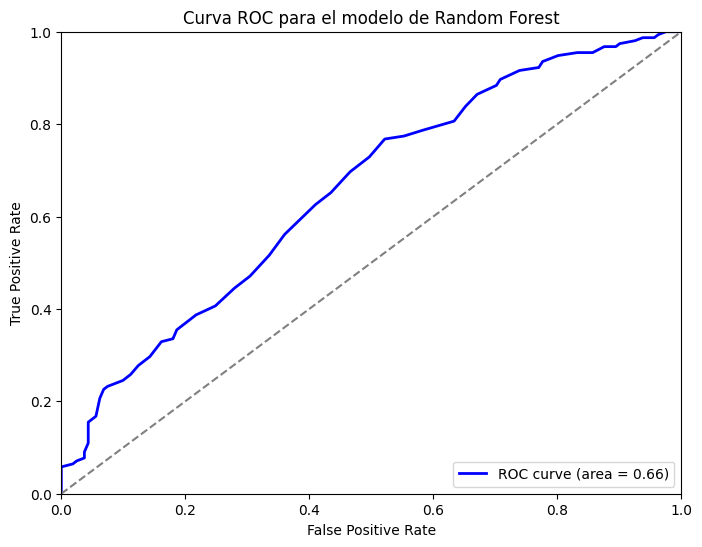

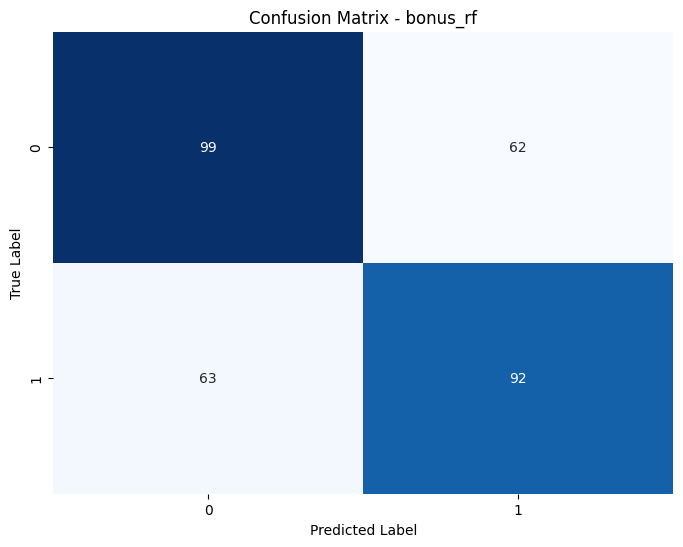

Importancia de Atributos (bonus_rf):
EXT_SOURCE_3        0.078747
EXT_SOURCE_1        0.044624
EXT_SOURCE_2        0.043509
DAYS_EMPLOYED       0.026671
AMT_ANNUITY         0.022448
                      ...   
FLAG_DOCUMENT_21    0.000000
FLAG_OWN_CAR        0.000000
FLAG_EMP_PHONE      0.000000
FLAG_MOBIL          0.000000
FLAG_DOCUMENT_10    0.000000
Length: 121, dtype: float64


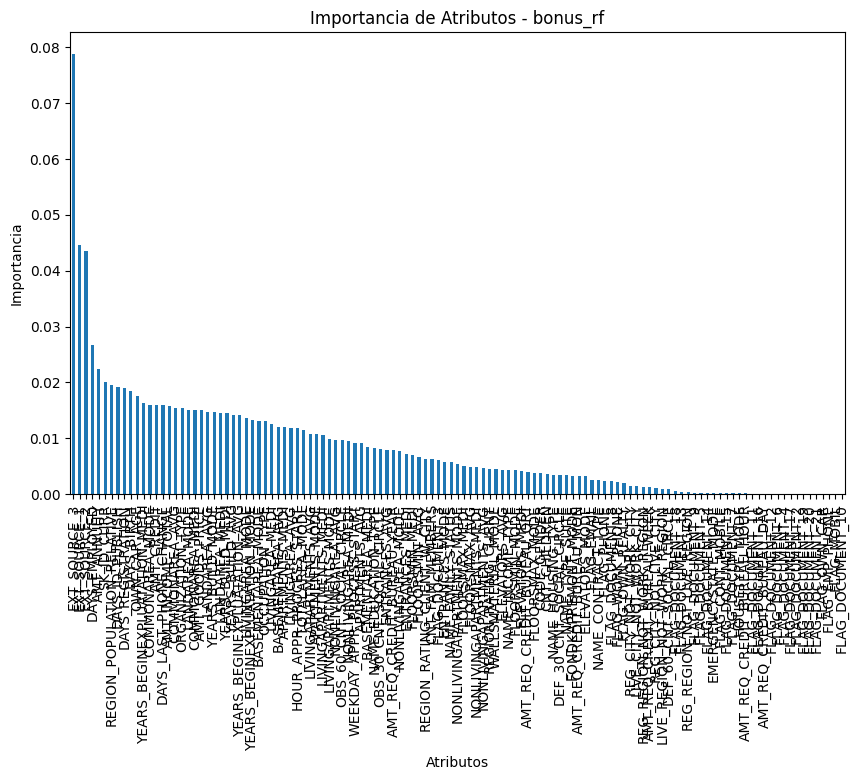

In [30]:
# Separar el dataset en características (X) y el objetivo (y)
X = le_transformed_ds.drop('TARGET', axis=1)  # Eliminar la columna objetivo
y = le_transformed_ds['TARGET']

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de Random Forest
bonus_rf = RandomForestClassifier(random_state=42)
bonus_rf.fit(X_train, y_train)

# Predecir sobre el conjunto de prueba
y_pred_rf = bonus_rf.predict(X_test)

from sklearn.metrics import precision_score, roc_curve, auc
import matplotlib.pyplot as plt

# Calcular la precisión del modelo de Random Forest
precision_rf = precision_score(y_test, y_pred_rf)
print("Precisión (bonus_rf):", precision_rf)

# Obtener las probabilidades predichas para la curva ROC
y_pred_proba_rf = bonus_rf.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva

# Generar la curva ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para el modelo de Random Forest')
plt.legend(loc='lower right')
plt.show()

# Mostrar la matriz de confusión usando seaborn heatmap
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - bonus_rf')
plt.show()

# Importancia de los atributos
importances_rf = bonus_rf.feature_importances_
feature_importances_rf = pd.Series(importances_rf, index=X_train.columns).sort_values(ascending=False)

print("Importancia de Atributos (bonus_rf):")
print(feature_importances_rf)

# Visualizar la importancia de los atributos
plt.figure(figsize=(10, 6))
feature_importances_rf.plot(kind='bar')
plt.title('Importancia de Atributos - bonus_rf')
plt.xlabel('Atributos')
plt.ylabel('Importancia')
plt.show()
